In [26]:
#Importing libraries
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.colors import ListedColormap
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
import seaborn as sns

In [27]:
#Loading data
data=pd.read_csv('C:/Users/Asus/Desktop/breast-cancer-wisconsin.csv')
cancerData=data
#Dropped IDNumber column as it serves no purpose during the kNN classification
cancerData = cancerData.drop('IDNumber', axis=1)
cancerData= pd.DataFrame(cancerData)
print(cancerData.head(5))
shape=cancerData.shape
print('\nDataFrame shape: ',shape)
print('\nNumber of Rows: ',shape[0])
print('\nNumber of Columns ',shape[1])

   ClumpThickness  UniformityofCellSize  UniformityofCellShape  \
0               5                     1                      1   
1               5                     4                      4   
2               3                     1                      1   
3               6                     8                      8   
4               4                     1                      1   

   MarginalAdhesion  SingleEpithelialCellSize  BareNuclei  BlandChromatin  \
0                 1                         2           1               3   
1                 5                         7          10               3   
2                 1                         2           2               3   
3                 1                         3           4               3   
4                 3                         2           1               3   

   NormalNucleoli  Mitoses  Class  
0               1        1      2  
1               2        1      2  
2               1        1      

In [28]:
#Normalization
#Refreshing data: the purpose of parsing the data again is to normalize attributes without normalizing the Class column, 
#as it is the identifier if a person has Breast Cancer or not

refreshData=pd.read_csv('C:/Users/Asus/Desktop/breast-cancer-wisconsin.csv')
Class=pd.DataFrame(refreshData,columns=['Class'])
cancerData = cancerData.drop('Class', axis=1)
scaler = Normalizer().fit(cancerData)
normalizeData = scaler.transform(cancerData)
normalizeData = pd.DataFrame(normalizeData, index=cancerData.index, columns=cancerData.columns)

#Re-inserting the 'Class' column now that the Normalization is done
cancerData.insert(9,'Class',Class,True)
normalizeData.insert(9,'Class',Class,True)
print(normalizeData)

     ClumpThickness  UniformityofCellSize  UniformityofCellShape  \
0          0.753778              0.150756               0.150756   
1          0.319438              0.255551               0.255551   
2          0.538816              0.179605               0.179605   
3          0.380235              0.506979               0.506979   
4          0.609994              0.152499               0.152499   
..              ...                   ...                    ...   
694        0.566947              0.188982               0.188982   
695        0.516398              0.258199               0.258199   
696        0.233126              0.466252               0.466252   
697        0.233285              0.466569               0.349927   
698        0.221201              0.442401               0.442401   

     MarginalAdhesion  SingleEpithelialCellSize  BareNuclei  BlandChromatin  \
0            0.150756                  0.301511    0.150756        0.452267   
1            0.319438    

In [29]:
# With reference to the Dataset on the column "Class" 2 represents "Benign", 4 represents "Malignant" 
cancerDataBind = dict(zip(normalizeData.Class.unique(),['Benign','Malignant']))
print(cancerDataBind)

{2: 'Benign', 4: 'Malignant'}


Shape of featured dataframe (X) (699, 9)
Shape of featured dataframe (Y) (699,)


<IPython.core.display.Javascript object>


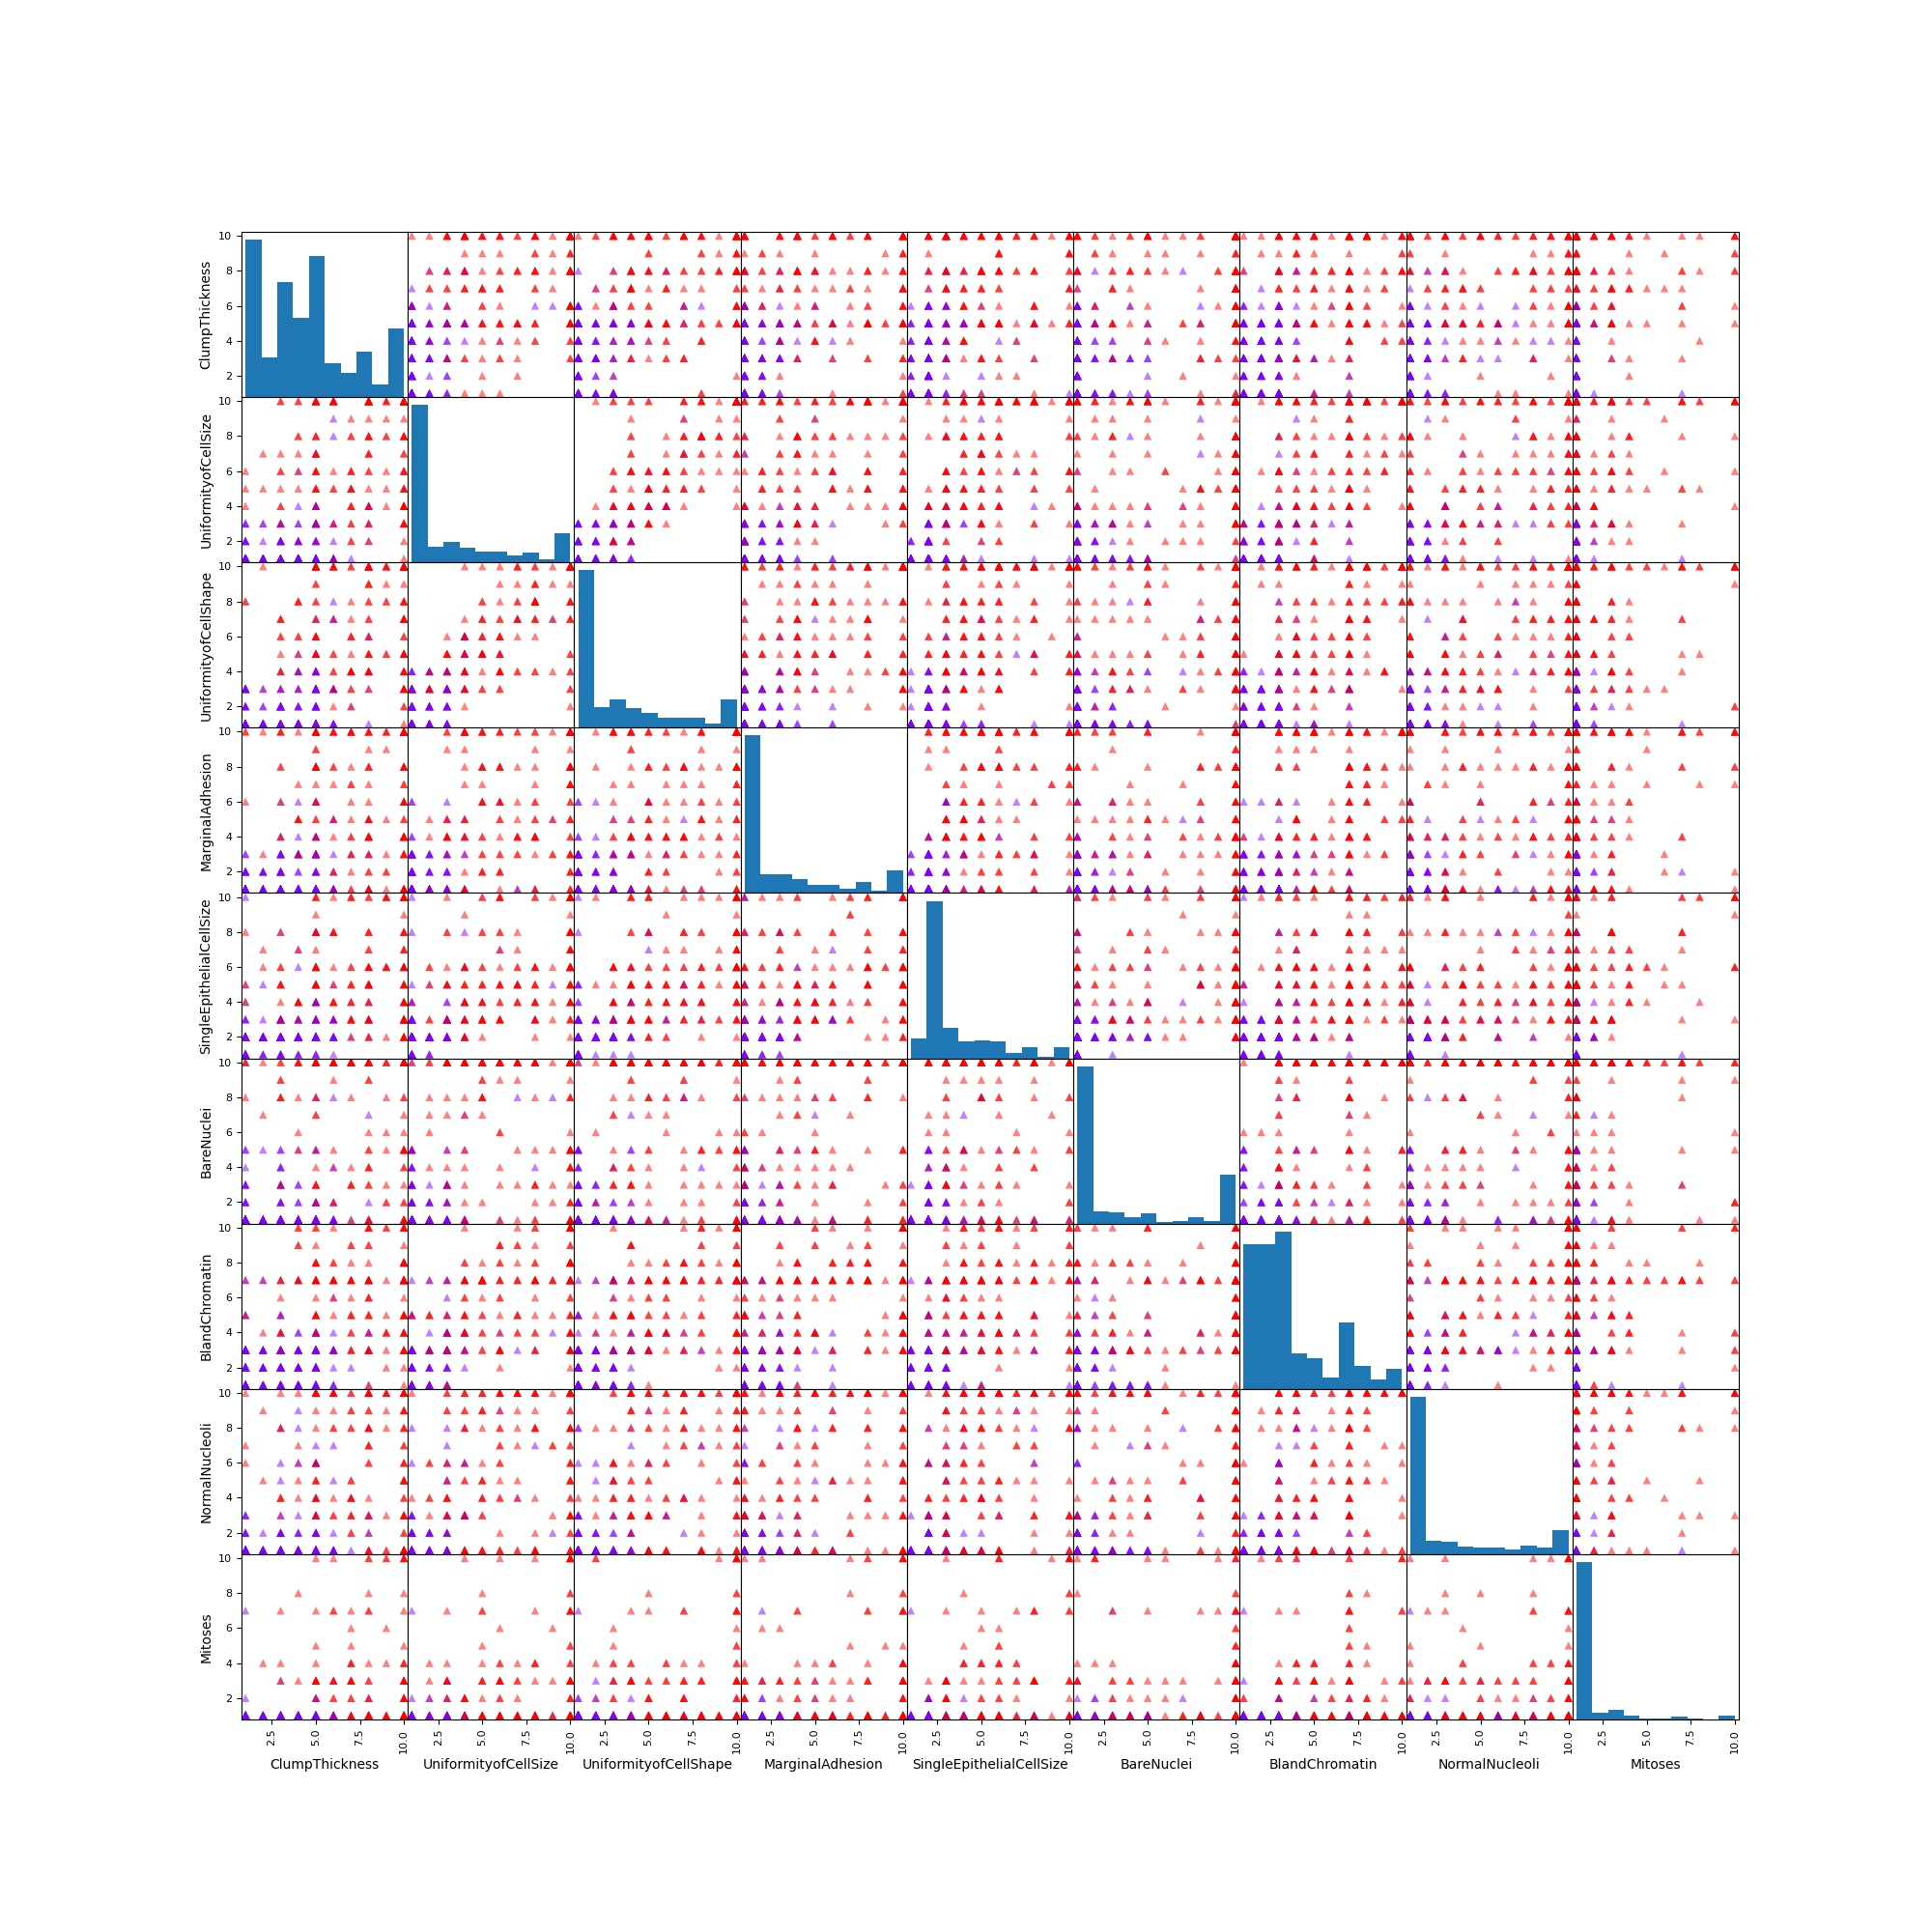

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

X=cancerData[['ClumpThickness',
             'UniformityofCellSize',
             'UniformityofCellShape',
             'MarginalAdhesion',
             'SingleEpithelialCellSize',
             'BareNuclei',
             'BlandChromatin',
             'NormalNucleoli',
             'Mitoses']]

y=normalizeData['Class']
X_train, X_text, y_train, y_test = train_test_split(X , y,random_state=0)

print("Shape of featured dataframe (X)",X.shape)
print("Shape of featured dataframe (Y)",y.shape)

cmap=cm.get_cmap('rainbow')
scatter=pd.plotting.scatter_matrix(X_train,c=y_train,marker='^',figsize=(20,20),cmap=cmap)

In [31]:
X = normalizeData[['ClumpThickness','UniformityofCellSize',
            'UniformityofCellShape',
            'MarginalAdhesion',
            'SingleEpithelialCellSize',
            'BareNuclei',
            'BlandChromatin',
            'NormalNucleoli',
            'Mitoses']]
y = normalizeData['Class']
print('Shape of X : ',X.shape)
print('Shape of Y : ',y.shape)

#Split the dataset into seperate training/testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

print('\nX_train Dataset with Shape',X_train.shape,':\n',X_train)
print('\nX_test Dataset with Shape',X_test.shape,':\n',X_test)

Shape of X :  (699, 9)
Shape of Y :  (699,)

X_train Dataset with Shape (524, 9) :
      ClumpThickness  UniformityofCellSize  UniformityofCellShape  \
570        0.386244              0.482805               0.193122   
34         0.588348              0.196116               0.392232   
506        0.335968              0.419961               0.419961   
514        0.268866              0.268866               0.313678   
567        0.648886              0.162221               0.162221   
..              ...                   ...                    ...   
359        0.631194              0.189358               0.315597   
192        0.800641              0.160128               0.160128   
629        0.769800              0.192450               0.192450   
559        0.800641              0.160128               0.160128   
684        0.288675              0.288675               0.288675   

     MarginalAdhesion  SingleEpithelialCellSize  BareNuclei  BlandChromatin  \
570          0.19312

In [32]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8857142857142857

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred=knn.predict(X_test)
result=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(result)
result1=classification_report(y_test,y_pred)
print("Classification Report:",)
print(result1)
result2=accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix: 
[[98 14]
 [ 6 57]]
Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.88      0.91       112
           4       0.80      0.90      0.85        63

    accuracy                           0.89       175
   macro avg       0.87      0.89      0.88       175
weighted avg       0.89      0.89      0.89       175

Accuracy: 0.8857142857142857


In [34]:
BC_prediction = knn.predict([[1,1,1,1,1,1,1,1,1]])
print("Predicition for Breast Cancer with obervations ",[[0.5,0.67,0.3,0.12,0.5,0.32,0.98,0.76,0.84]]," is ",cancerDataBind[BC_prediction[0]])

Predicition for Breast Cancer with obervations  [[0.5, 0.67, 0.3, 0.12, 0.5, 0.32, 0.98, 0.76, 0.84]]  is  Benign


In [35]:
BC_prediction = knn.predict([[1,1,1,1,1,1,1,1,1]])
print("Predicition for Breast Cancer with obervations ",[[1,1,1,1,1,1,1,1,1]]," is ",cancerDataBind[BC_prediction[0]])

Predicition for Breast Cancer with obervations  [[1, 1, 1, 1, 1, 1, 1, 1, 1]]  is  Benign


In [36]:
def plot_knn_decision_boundaries(X, y, n_neighbors, weights, first, second):
    if isinstance(X, (pd.DataFrame,)):
        #X_mat = X[['height', 'width']].as_matrix()
        #y_mat = y.as_matrix()
        X_mat = X[[first,second]].values
        y_mat = y.values
        
    elif isinstance(X, (np.ndarray,)):
        # When X was scaled is already a matrix
        X_mat = X_mat[:, :2]
        #y_mat = y.as_matrix()
        y_mat = y.values
        
    # Create color maps
    cmap_light = ListedColormap(['#FF0000', '#00FF00'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00'])

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    # numpy.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='Malignant')
    patch1 = mpatches.Patch(color='#00FF00', label='Benigns')
    plt.legend(handles=[patch0, patch1])


    plt.xlabel(first)
    plt.ylabel(second)

    plt.show()

In [38]:
#Note: You can only enter values (ClumpThickness, UniformityofCellSize, UniformityofCellShape, MarginalAdhesion,
# SingleEpithelialCellSize, BareNuclei, BlandChromatin, NormalNucleoli, Mitoses)
first = input('Enter first feature: ')
second = input('Enter second feature: ')

Enter first feature: Mitoses
Enter second feature: ClumpThickness


<IPython.core.display.Javascript object>


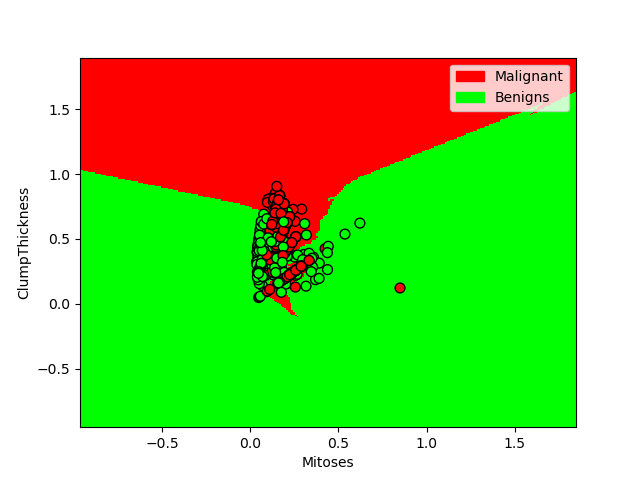

In [39]:
plot_knn_decision_boundaries(X_train,y_train,5,'uniform',first,second) #plot decision boundaris of kNN with k=5

<IPython.core.display.Javascript object>


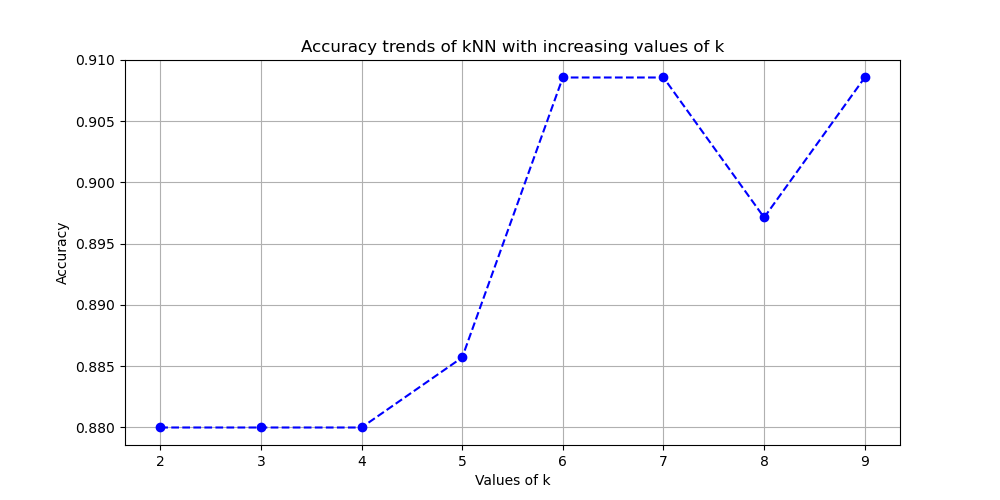

In [40]:
k_range=range(2,10)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

plt.figure(figsize=(10,5))
plt.title('Accuracy trends of kNN with increasing values of k')
plt.xlabel('Values of k')
plt.ylabel('Accuracy')
plt.xticks([2,3,4,5,6,7,8,9])
plt.plot(k_range,scores,'--bo')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


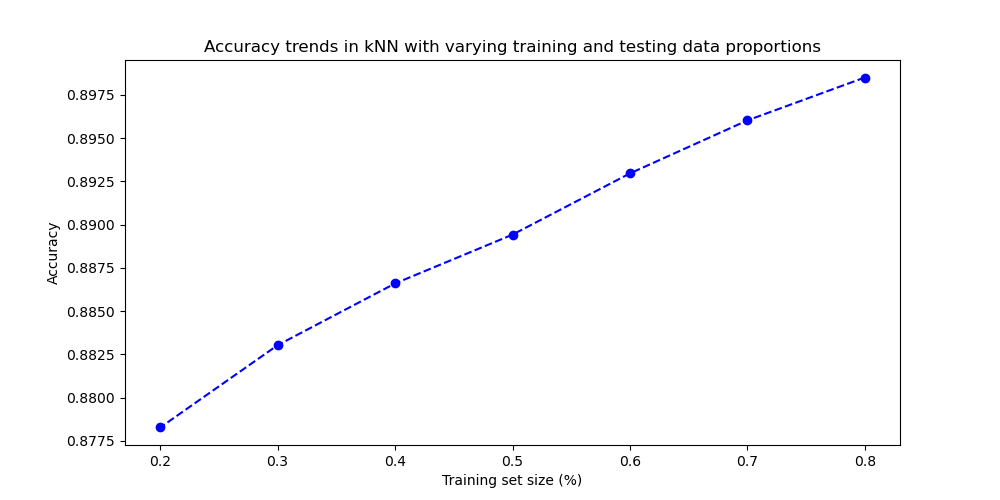

In [46]:
training_size=[0.8 ,0.7 ,0.6 ,0.5 ,0.4 ,0.3 ,0.2]
mean_scores=[]

knn=KNeighborsClassifier(n_neighbors=5)

plt.figure(figsize=(10,5))
plt.title("Accuracy trends in kNN with varying training and testing data proportions")
plt.xlabel("Training set size (%)")
plt.ylabel("Accuracy")
plt.show()

for s in training_size:
    scores=[]
    for i in range(1,1000):
        X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 1-s )
        knn.fit(X_train,y_train)
        scores.append(knn.score(X_test,y_test))
    mean_scores.append(np.mean(scores))
        
plt.plot(training_size,mean_scores,'--bo')
plt.show()

<IPython.core.display.Javascript object>


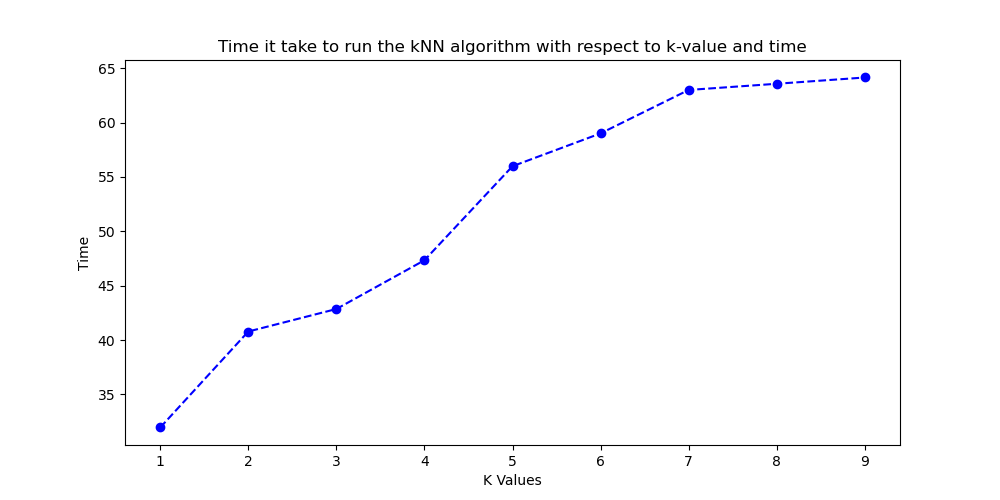

In [109]:
import timeit
training_size=[0.8 ,0.7 ,0.6 ,0.5 ,0.4 ,0.3 ,0.2]
k_range=range(1,10)
mean_scores=[]
time=[]

plt.figure(figsize=(10,5))
plt.title("Time it take to run the kNN algorithm with respect to k-value and time")
plt.xlabel("K Values")
plt.ylabel("Time")



for s in k_range:
    knn=KNeighborsClassifier(n_neighbors=s)
    scores=[]
    start = timeit.default_timer()
    for i in range(1,1000):
        X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.8)
        knn.fit(X_train,y_train)
        scores.append(knn.score(X_test,y_test))
    mean_scores.append(np.mean(scores))
    stop = timeit.default_timer()
    execution_time = stop - start
    time.append(execution_time)

plt.plot(k_range,time,'--bo')
plt.show()

